## Importing Necessary Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Training Dataset

In [58]:
training_data = pd.read_csv('Train.csv')
training_data = training_data.drop(['Unnamed: 0','Name'], axis=1)
training_data = pd.get_dummies(training_data, columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True) # Converting categorical variables into dummies
training_data = training_data.dropna()
# Cleaning the data
training_data.Mileage = training_data.Mileage.str.replace(' kmpl','')
training_data.Mileage = pd.to_numeric(training_data.Mileage, errors='coerce')
training_data.Engine = training_data.Engine.str.replace(' CC','')
training_data.Engine = pd.to_numeric(training_data.Engine, errors='coerce')
training_data = training_data[training_data.Power != 'null bhp']
training_data.Power = training_data.Power.str.replace(' bhp','')
training_data.Power = pd.to_numeric(training_data.Power, errors='coerce')

training_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2017,16500,23.84,1199,84.00,5.0,5.00,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,2017,47357,18.49,1493,100.00,7.0,8.37,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2014,35000,15.00,1598,103.52,5.0,4.50,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,2007,200000,17.20,1396,53.50,5.0,0.85,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2013,64000,21.02,1248,88.76,5.0,2.65,False,False,False,...,False,False,True,False,False,False,True,False,True,False


## Loading Testing Dataset

In [59]:
testing_data = pd.read_csv('Test.csv')
testing_data = testing_data.drop(['Unnamed: 0','Name'], axis=1)
testing_data = pd.get_dummies(testing_data, columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
testing_data = testing_data.dropna()
testing_data.Mileage = testing_data.Mileage.str.replace(' kmpl','')
testing_data.Mileage = pd.to_numeric(testing_data.Mileage, errors='coerce')
testing_data.Engine = testing_data.Engine.str.replace(' CC','')
testing_data.Engine = pd.to_numeric(testing_data.Engine, errors='coerce')
testing_data = testing_data[testing_data.Power != 'null bhp']
testing_data.Power = testing_data.Power.str.replace(' bhp','')
testing_data.Power = pd.to_numeric(testing_data.Power, errors='coerce')

testing_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2013,84175,23.40,1248,74.00,5.0,6.95,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2012,62282,16.95,1197,78.90,5.0,2.90,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2017,37460,18.60,1197,81.86,5.0,6.28,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3,2011,106976,13.50,2400,215.00,5.0,13.80,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2013,60000,20.36,1197,78.90,5.0,2.75,False,False,False,...,False,False,False,False,False,True,True,False,False,False


## Z-Score Normalization of the Training and Testing Datasets

In [60]:
training_numerical_features = training_data.select_dtypes(include=['int64','float64']).columns # Finding numerical data
training_numerical_features = training_numerical_features.drop('Price')

# Performing Feature Scaling
training_data[training_numerical_features] = (training_data[training_numerical_features] - training_data[training_numerical_features].mean()) / training_data[training_numerical_features].std()

# Inspecting scaled data
training_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1.127269,-1.020251,1.316366,-0.711259,-0.546072,-0.351374,5.00,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,1.127269,-0.255071,0.068488,-0.223363,-0.251070,2.121461,8.37,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.176632,-0.561495,-0.745549,-0.049114,-0.186170,-0.351374,4.50,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,-2.041520,3.530111,-0.232403,-0.384335,-1.108418,-0.351374,0.85,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,-0.140247,0.157636,0.658606,-0.629943,-0.458309,-0.351374,2.65,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [61]:
testing_numerical_features = testing_data.select_dtypes(include=['int64','float64']).columns
testing_numerical_features = testing_numerical_features.drop('Price')

# Performing feature scaling
testing_data[testing_numerical_features] = (testing_data[testing_numerical_features] - testing_data[testing_numerical_features].mean()) / testing_data[testing_numerical_features].std()

testing_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-0.166278,0.118047,1.236734,-0.679771,-0.801440,-0.381061,6.95,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,-0.483790,0.001074,-0.287738,-0.767349,-0.704491,-0.381061,2.90,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1.103767,-0.131549,0.102244,-0.767349,-0.645925,-0.381061,6.28,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3,-0.801301,0.239872,-1.103152,1.298475,1.988335,-0.381061,13.80,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,-0.166278,-0.011118,0.518223,-0.767349,-0.704491,-0.381061,2.75,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [62]:

X_train = training_data.drop('Price', axis=1).values.astype('float64') # Ensuring feature array is of float64 type
y_train = training_data['Price'].values.astype('float64') # Ensuring target array is of float64 type

X_test = testing_data.drop('Price', axis=1).values.astype('float64')
y_test = testing_data['Price'].values.astype('float64')

print("Shape of X_standarized:", X_train.shape)
print("Shape of Y_standarized:", y_train.shape)

Shape of X_standarized: (3649, 22)
Shape of Y_standarized: (3649,)


## Implementing Function to Calculate Accuracy Metrics

In [63]:
def calculate_metrics(y_true, y_pred):
    # Mean Squared Error
    mse = np.mean(np.square(y_true - y_pred))
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    # R² Score
    ss_tot = np.sum(np.square(y_true - np.mean(y_true)))
    ss_res = np.sum(np.square(y_true - y_pred))
    r2 = 1 - (ss_res / ss_tot)
    return mse, rmse, r2

## Implementing Cost Function

In [64]:
def cost_function(X, y, weights):
    m = len(y)  # Total number of training examples
    predictions = X.dot(weights)  # Calculate predictions
    cost = (1 / (2 * m)) * np.sum((predictions - y)**2)  # Compute cost
    return cost

## Implementing Gradient Descent

In [65]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations) 
    final_r2 = None  # Initialize final_r2 to store R2 from the final iteration

    for i in range(iterations):
        predictions = X.dot(weights)  # Making predictions
        gradients = (1 / m) * X.T.dot(predictions - y ) 

        weights -= learning_rate * gradients  # Update weights
        cost = cost_function(X, y, weights)  # Calculate cost
        cost_history[i] = cost  # Store cost history

        # Calculate metrics and print every 100 iterations
        if i % 100 == 0:
            mse, rmse, r2 = calculate_metrics(y, predictions)
            print(f"Iteration {i}:")
            print(f"MSE: {mse:.2f}")
            print(f"RMSE: {rmse:.2f}")
            print(f"R² Score: {r2:.4f}")
            print(f"Cost: {cost}\n")

            

        # Update final_r2 with the R2 from the last iteration
        if i == iterations - 1:
            _, _, final_r2 = calculate_metrics(y, predictions)

    final_bias = weights[0]
    final_weights = weights[1:]
    print("Final Bias:", final_bias)
    print("Final Weights:", final_weights)

    return weights, cost_history, final_r2


## Training The Model

In [66]:
def linear_regression(X, y, learning_rate, iterations):
    n = X.shape[1] # Finding number of features
    weights = np.zeros(n)  # Initialize weights
    weights, cost_history, final_r2 = gradient_descent(X, y, weights, learning_rate, iterations)
    return weights, cost_history, final_r2


In [67]:
learning_rate = 0.1
iterations = 1000
X_train_biased = np.c_[np.ones(X_train.shape[0]), X_train] # Adding a column of 1s as bias
weights, cost_history, final_r2 = linear_regression(X_train_biased, y_train, learning_rate, iterations)

print("Final cost:", cost_history[-1])

Iteration 0:
MSE: 219.99
RMSE: 14.83
R² Score: -0.7306
Cost: 84.17136128816682

Iteration 100:
MSE: 39.68
RMSE: 6.30
R² Score: 0.6879
Cost: 19.825787818912104

Iteration 200:
MSE: 38.25
RMSE: 6.18
R² Score: 0.6991
Cost: 19.1193959645081

Iteration 300:
MSE: 37.89
RMSE: 6.16
R² Score: 0.7019
Cost: 18.945006016932567

Iteration 400:
MSE: 37.80
RMSE: 6.15
R² Score: 0.7027
Cost: 18.898841444059233

Iteration 500:
MSE: 37.77
RMSE: 6.15
R² Score: 0.7029
Cost: 18.886195022181028

Iteration 600:
MSE: 37.77
RMSE: 6.15
R² Score: 0.7029
Cost: 18.882635442070566

Iteration 700:
MSE: 37.76
RMSE: 6.15
R² Score: 0.7029
Cost: 18.881585918197914

Iteration 800:
MSE: 37.76
RMSE: 6.15
R² Score: 0.7029
Cost: 18.88124110924335

Iteration 900:
MSE: 37.76
RMSE: 6.15
R² Score: 0.7029
Cost: 18.881099677038822

Final Bias: 11.821841492409009
Final Weights: [ 2.94348052 -1.02062309 -0.99192659  0.51710499  6.47296044 -0.73169389
  2.36755831  1.72535859  2.49931191 -0.38980517  2.81871861  1.50072017
  0.6680397

## Visualizing Cost over Iterations

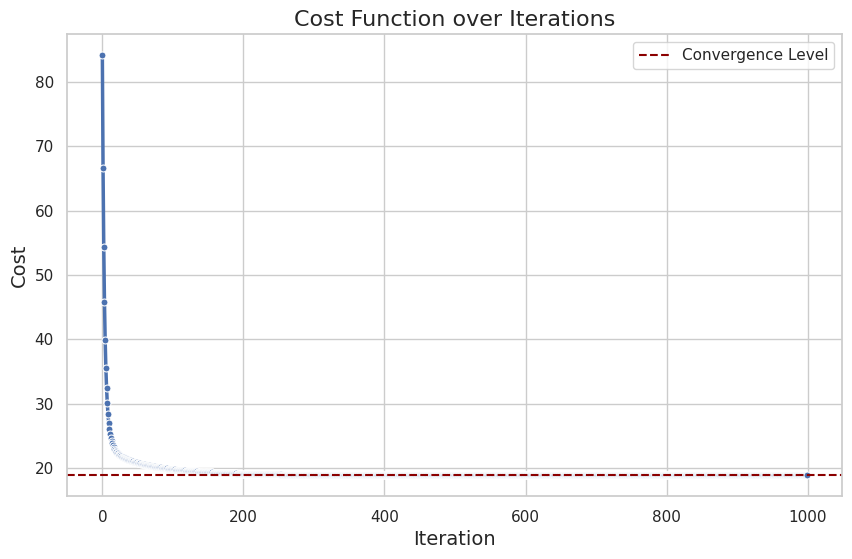

In [68]:


cost_df = pd.DataFrame({
    'Iteration': np.arange(len(cost_history)),  # Create an array of iteration numbers
    'Cost': cost_history  # Cost values
})
sns.set(style="whitegrid")
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=cost_df, x='Iteration', y='Cost', marker='o', linewidth=2.5, markersize=5)

# Adding a reference line to indicate convergence
plt.axhline(y=np.min(cost_history), color='#8B0000', linestyle='--', label='Convergence Level')


plt.title('Cost Function over Iterations', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.legend()

plt.show()

## Making Predictions Through The Model

In [69]:
def predict(X, weights):
    raw_predictions = X.dot(weights) 
    capped_predictions = np.maximum(raw_predictions, 0)  # Minimum prediction capped to 0 as price cannot be negative
    return capped_predictions

X_test_biased = np.c_[np.ones(X_test.shape[0]), X_test]  # Add a column of 1s as bias

predictions = predict(X_test_biased, weights)

# Display the first 10 predictions and actual values
print("Predictions on test set:", predictions[:10])
print("Actual values on test set:", y_test[:10])

Predictions on test set: [ 5.00135769  2.71822454  6.03448173 25.18306522  0.32365481 18.71041257
  3.10579572 31.07452486 36.78735893  4.04277667]
Actual values on test set: [ 6.95  2.9   6.28 13.8   2.75 11.5   5.1  35.5  50.5   4.7 ]


## Visualizing Actual Prices (from Test.csv) versus Predicted Prices (from the model)

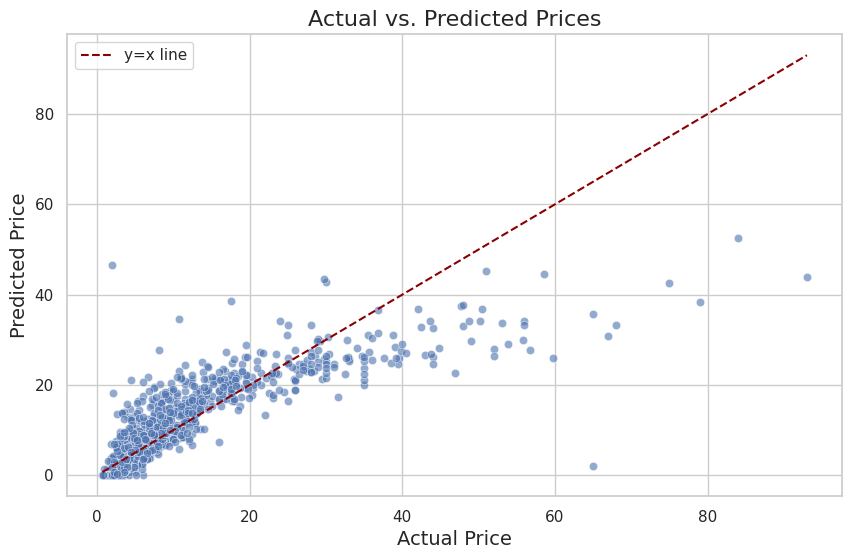

R² Score: 70.29%


In [70]:

results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': predictions
})


sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Actual Price', y='Predicted Price', alpha=0.6)

# Add a reference line y = x for better comparison
min_price = results_df['Actual Price'].min()
max_price = results_df['Actual Price'].max()
plt.plot([min_price, max_price], [min_price, max_price], color='#8B0000', linestyle='--', label='y=x line')


plt.title('Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.legend()


plt.show()  
# Display R2 score
print(f"R² Score: {final_r2 * 100:.2f}%")
